In [64]:
# Imports 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA

# Import SK-learn libraries for evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


# Load and split data

I added a scaling step to scale the inputs from 0-1 

In [7]:
# Read in Data
train_df = pandas.read_csv('./data/train.csv')
print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

In [8]:
# # Shuffle the available data
# np.random.seed(0)
# shuffle = np.random.permutation(np.arange(train_df.shape[0]))
# train_df = train_df.iloc[shuffle]


# # Assign desired number of obs to each partition
# num_train = int(train_df.shape[0] * 0.6)
# num_dev = int(train_df.shape[0] * 0.2)
# # test data will be remaining after train and dev are separated

# train_data, train_labels = train_df.iloc[:num_train,:-1], train_df.iloc[:num_train,-1:]
# dev_data, dev_labels = train_df.iloc[num_train:num_train + num_dev,:-1], train_df.iloc[num_train:num_train + num_dev,-1:]
# test_df, test_labels  = train_df.iloc[num_train + num_dev:,:-1], train_df.iloc[num_train + num_dev:,-1:]

# print("Available data: ", train_df.shape)
# print("Training partition: ", train_data.shape)
# print("Dev partition: ", dev_data.shape)
# print("Test partition: ", test_df.shape)

# # Provide cover type list and labels for output labeling
# cover_types = [1,2,3,4,5,6,7]
# cover_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

In [102]:
# Shuffle the available data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_df.shape[0]))
train_df = train_df.iloc[shuffle]

#scale inputs
unscaled_inputs = train_df.iloc[:,1:-1]
labels = train_df.iloc[:,-1:]
scaler = StandardScaler()
scaler.fit(unscaled_inputs)
scaled_inputs = scaler.transform(unscaled_inputs)

#partition train, dev, test (had to change how we partiton bc the old method didnt work on scaled arrays)
train_data, test_data, train_labels, test_labels = train_test_split(scaled_inputs, labels, test_size=0.2, random_state=1)
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print("Available data: ", train_df.shape)
print("Training partition: ", train_data.shape)
print("Dev partition: ", dev_data.shape)
print("Test partition: ", test_data.shape)

# Provide cover type list and labels for output labeling
cover_types = [1,2,3,4,5,6,7]
cover_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

Available data:  (15120, 56)
Training partition:  (9072, 54)
Dev partition:  (3024, 54)
Test partition:  (3024, 54)


# Testing SVMs with different kernels

linear kernel

Overall F1 score:  0.6672899423519538

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.62
2	Lodgepole Pine  	 0.53
3	Ponderosa Pine  	 0.55
4	Cottonwood/Willow	 0.82
5	Aspen           	 0.69
6	Douglas-fir     	 0.61
7	Krummholz       	 0.85


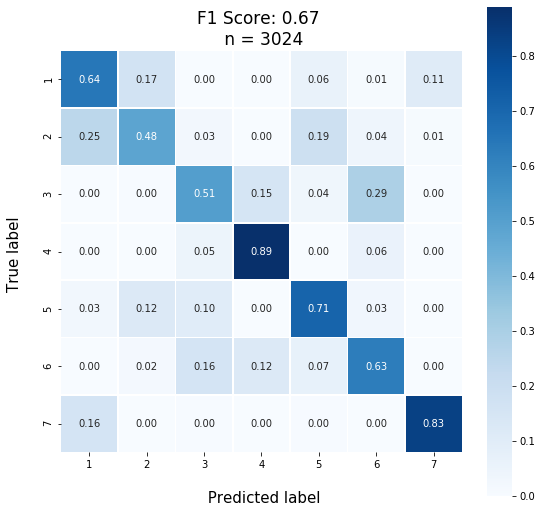

In [103]:
#linear kernel
lin_clf = LinearSVC(max_iter=1200000, dual = False)
lin_clf.fit(train_data, train_labels.values.ravel())

pred = lin_clf.predict(dev_data)

print("Overall F1 score: ", metrics.f1_score(dev_labels, pred, average='weighted'))
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

radial kernel

Overall F1 score:  0.7209707296190189

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.66
2	Lodgepole Pine  	 0.60
3	Ponderosa Pine  	 0.62
4	Cottonwood/Willow	 0.85
5	Aspen           	 0.79
6	Douglas-fir     	 0.65
7	Krummholz       	 0.88


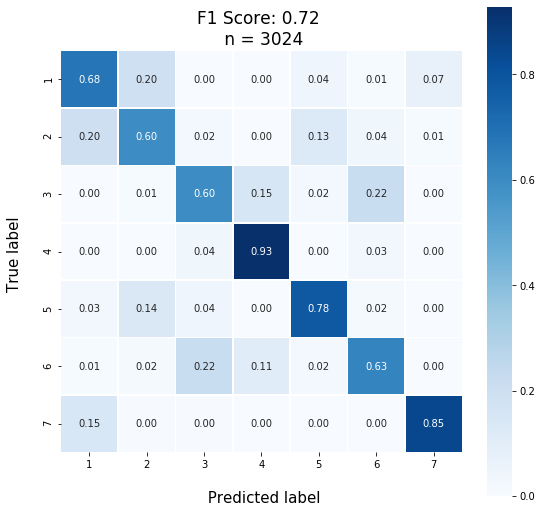

In [104]:
#radial kernel
rbf_clf = SVC(kernel='rbf') 
rbf_clf.fit(train_data, train_labels.values.ravel())



pred = rbf_clf.predict(dev_data)

print("Overall F1 score: ", metrics.f1_score(dev_labels, pred, average='weighted'))
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

polynomial kernel

Overall F1 score:  0.6967089813063114

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.60
2	Lodgepole Pine  	 0.60
3	Ponderosa Pine  	 0.60
4	Cottonwood/Willow	 0.84
5	Aspen           	 0.72
6	Douglas-fir     	 0.64
7	Krummholz       	 0.88


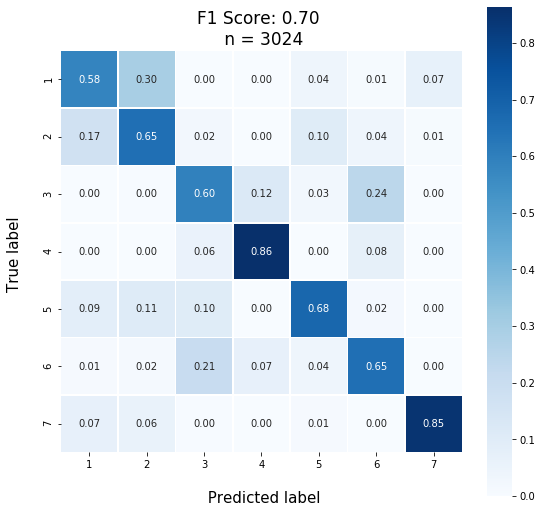

In [105]:
#polynomial kernel
poly_clf = SVC(kernel='poly') 
poly_clf.fit(train_data, train_labels.values.ravel())



pred = poly_clf.predict(dev_data)

print("Overall F1 score: ", metrics.f1_score(dev_labels, pred, average='weighted'))
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

# Try using GridSearch to find best params

this took an hour to run

In [37]:
#set values of hyperparameters
params = {'C': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100, 1000],
         'gamma': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100, 1000]}

#initiate gridsearch and fit model
clf = GridSearchCV(rbf_clf, params, cv=None, scoring='accuracy')
clf.fit(train_data, train_labels)

#show results of gridsearch
print("The best value of C is", clf.best_params_["C"])
print("The best value of gamma is", clf.best_params_["gamma"])

pd.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]]


/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

The best value of C is 10.0
The best value of gamma is 0.1


,params,mean_test_score
0,"{'C': 1e-10, 'gamma': 1e-10}",0.145723
1,"{'C': 1e-10, 'gamma': 0.0001}",0.145723
2,"{'C': 1e-10, 'gamma': 0.001}",0.145723
3,"{'C': 1e-10, 'gamma': 0.01}",0.145723
4,"{'C': 1e-10, 'gamma': 0.1}",0.145723
...,...,...
116,"{'C': 1000, 'gamma': 1.0}",0.750881
117,"{'C': 1000, 'gamma': 2.0}",0.683310
118,"{'C': 1000, 'gamma': 10.0}",0.427028
119,"{'C': 1000, 'gamma': 100}",0.168540


after applying optimal hyperparameters, the model preforms better

Overall F1 score:  0.8165730143045499

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.74
2	Lodgepole Pine  	 0.70
3	Ponderosa Pine  	 0.75
4	Cottonwood/Willow	 0.92
5	Aspen           	 0.89
6	Douglas-fir     	 0.78
7	Krummholz       	 0.93


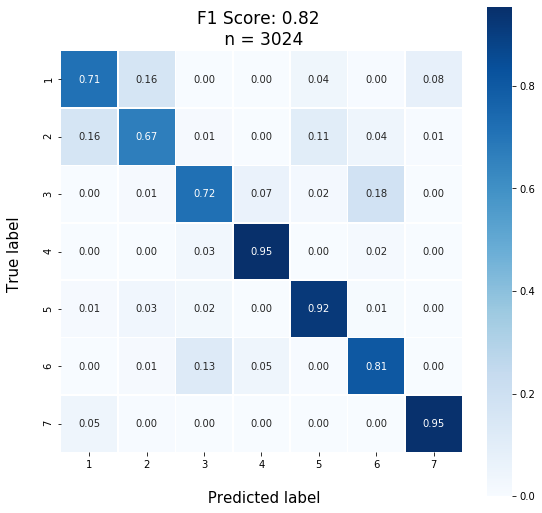

In [106]:
#radial kernel with adjusted C and gamma
rbf_clf = SVC(kernel='rbf', C=10, gamma=0.1, probability=True) 
rbf_clf.fit(train_data, train_labels.values.ravel())


pred = rbf_clf.predict(dev_data)

print("Overall F1 score: ", metrics.f1_score(dev_labels, pred, average='weighted'))
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

# AdaBoost

start with gridsearch to find best params

In [42]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))
ada.fit(train_data, train_labels)

#set values of hyperparameters
params = {'n_estimators': [1, 10, 100, 500],
         'learning_rate': [0.5, 1, 5, 10]}

#initiate gridsearch and fit model
clf = GridSearchCV(ada, params, cv=None, scoring='accuracy')
clf.fit(train_data, train_labels)

#show results of gridsearch
print("The best value of n_estimators is", clf.best_params_["n_estimators"])
print("The best value of learning_rate is", clf.best_params_["learning_rate"])

pd.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]]


/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

The best value of n_estimators is 500
The best value of learning_rate is 0.5


,params,mean_test_score
0,"{'learning_rate': 0.5, 'n_estimators': 1}",0.771716
1,"{'learning_rate': 0.5, 'n_estimators': 10}",0.822530
2,"{'learning_rate': 0.5, 'n_estimators': 100}",0.855710
3,"{'learning_rate': 0.5, 'n_estimators': 500}",0.860009
4,"{'learning_rate': 1, 'n_estimators': 1}",0.769842
5,"{'learning_rate': 1, 'n_estimators': 10}",0.822642
6,"{'learning_rate': 1, 'n_estimators': 100}",0.856152
7,"{'learning_rate': 1, 'n_estimators': 500}",0.859238
8,"{'learning_rate': 5, 'n_estimators': 1}",0.770172
9,"{'learning_rate': 5, 'n_estimators': 10}",0.595787


/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


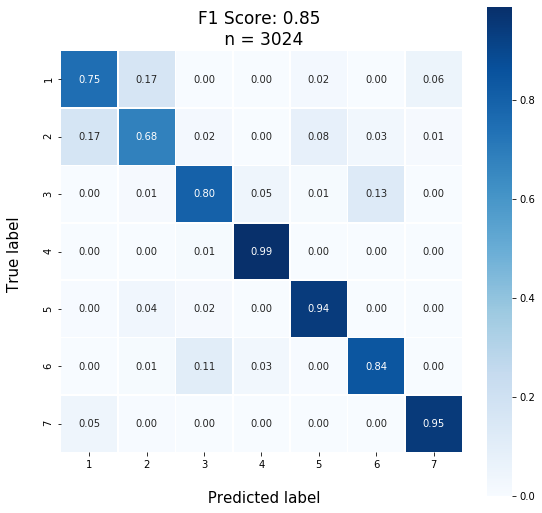

In [107]:
#AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=500, learning_rate=.5)
ada.fit(train_data, train_labels)
pred = ada.predict(dev_data)

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

# Test data 

In [3]:
# Read in Data
test_df = pandas.read_csv('./data/test.csv')
print("Shape is:", test_df.shape)
print("Columns are:", test_df.columns)

Shape is: (565892, 55)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 

In [108]:
#scale inputs
unscaled_test = test_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(unscaled_test)
scaled_test = scaler.transform(unscaled_test)

### try best models to predict test set

In [51]:
pred = rbf_clf.predict(scaled_test)

In [52]:
print(pred)

[2 2 2 ... 2 2 2]


In [53]:
unique, counts = np.unique(pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     1 148230]
 [     2 270723]
 [     3  22253]
 [     4   1843]
 [     5  67961]
 [     6  28597]
 [     7  26285]]


<BarContainer object of 7 artists>

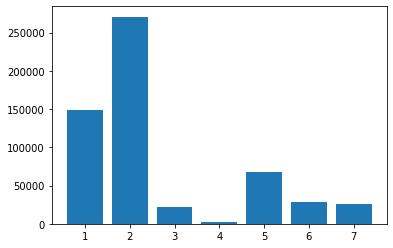

In [54]:
plt.bar(unique, counts)

In [56]:
proba = rbf_clf.predict_proba(scaled_test)
print(proba)

[[0.02057003 0.90833104 0.01251762 ... 0.04010349 0.01313144 0.00227521]
 [0.04889624 0.80512016 0.01182225 ... 0.10999837 0.01733641 0.00260284]
 [0.06032731 0.81414693 0.01058202 ... 0.09188312 0.01631471 0.00253561]
 ...
 [0.30475661 0.41167598 0.09184398 ... 0.04987387 0.06013173 0.06777782]
 [0.30273331 0.40559938 0.09389924 ... 0.05090955 0.06495458 0.06765997]
 [0.30208747 0.4060059  0.09427476 ... 0.05071011 0.06505156 0.06752369]]


### how confident is this model on average?

In [60]:
np.mean(np.amax(proba, axis=1))

0.6232031603691146

looks like a large chunk of the test set is types 1 and 2. yikes

[2 2 2 ... 3 3 3]
[[     1 146490]
 [     2 189159]
 [     3  79453]
 [     4  14594]
 [     5  46097]
 [     6  63171]
 [     7  26928]]


<BarContainer object of 7 artists>

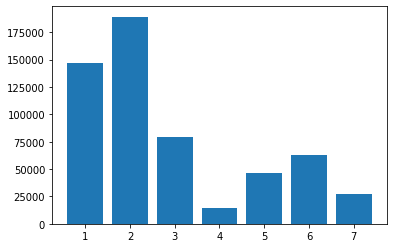

In [46]:
#try with adaboost
pred2 = ada.predict(scaled_test)
print(pred2)

unique, counts = np.unique(pred2, return_counts=True)
print(np.asarray((unique, counts)).T)
plt.bar(unique, counts)

In [61]:
proba2 = ada.predict_proba(scaled_test)
print(proba2)

[[9.36199173e-05 7.92318230e-01 1.97236813e-04 ... 8.79058685e-02
  1.17792813e-01 4.31272178e-06]
 [2.22293339e-06 9.94876636e-01 4.10109218e-06 ... 2.95714285e-03
  2.13211986e-03 2.04685537e-07]
 [5.22504440e-06 9.93352816e-01 3.95154467e-06 ... 2.93321705e-03
  3.68919652e-03 2.18297008e-07]
 ...
 [3.79340665e-10 1.97478108e-09 9.99913734e-01 ... 1.34863363e-09
  8.41332943e-05 2.60391039e-10]
 [2.82341745e-09 1.29773413e-08 9.98443607e-01 ... 7.52994185e-09
  1.53351854e-03 1.70939085e-09]
 [3.00440274e-09 1.25121893e-08 9.98996866e-01 ... 7.16882652e-09
  9.71480429e-04 1.76374409e-09]]


### Confidence of the model

In [62]:
np.mean(np.amax(proba2, axis=1))

0.9253370149871517

seems like adaboost may be more confident?

# Trying Feature Engineering

### PCA

In [65]:
#initiate PCA and fit training data 
pca = PCA()
pca.fit(train_data)

#loop through Ks and print fraction of variance explained
for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:
    variance = sum(pca.explained_variance_ratio_[:k])
    print("Fraction of variance explained by first {} principal components: ".format(k), round(variance,3))    


Fraction of variance explained by first 1 principal components:  0.081
Fraction of variance explained by first 2 principal components:  0.14
Fraction of variance explained by first 3 principal components:  0.188
Fraction of variance explained by first 4 principal components:  0.228
Fraction of variance explained by first 5 principal components:  0.26
Fraction of variance explained by first 10 principal components:  0.384
Fraction of variance explained by first 20 principal components:  0.591
Fraction of variance explained by first 30 principal components:  0.786
Fraction of variance explained by first 40 principal components:  0.947
Fraction of variance explained by first 50 principal components:  1.0


Text(0.5, 1.0, 'Forest Cover Type')

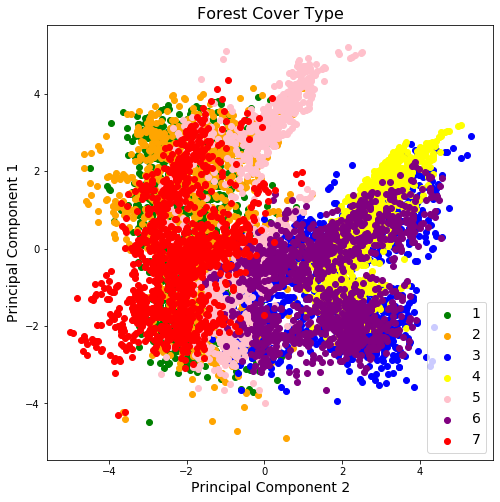

In [94]:
#initiate PCA and fit training data 
pca = PCA(n_components=2)
pca.fit(train_data)  

#transform trainind data to 2 dimensions
X = pca.transform(train_data)


mask1= (train_labels.values.ravel()) == 1
mask2= (train_labels.values.ravel()) == 2
mask3= (train_labels.values.ravel()) == 3
mask4= (train_labels.values.ravel()) == 4
mask5= (train_labels.values.ravel()) == 5
mask6= (train_labels.values.ravel()) == 6
mask7= (train_labels.values.ravel()) == 7

#for the plot
plt.figure(figsize=(8,8))
plt.scatter(X[mask1, 0], X[mask1, 1],c="green", label = "1")
plt.scatter(X[mask2, 0], X[mask2, 1],c="orange", label = "2")
plt.scatter(X[mask3, 0], X[mask3, 1],c="blue", label = "3")
plt.scatter(X[mask4, 0], X[mask4, 1],c="yellow", label = "4")
plt.scatter(X[mask5, 0], X[mask5, 1],c="pink", label = "5")
plt.scatter(X[mask6, 0], X[mask6, 1],c="purple", label = "6")
plt.scatter(X[mask7, 0], X[mask7, 1],c="red", label = "7")
plt.legend(fontsize= 14)
plt.ylabel("Principal Component 1", fontsize=14)
plt.xlabel("Principal Component 2", fontsize=14)
plt.title("Forest Cover Type", fontsize=16)

2 PCA components do not separate cover types sufficiently. Will have to use more than 2

In [109]:
#initiate PCA and fit training data with 40 PCA components
pca = PCA(n_components=40)
pca.fit(train_data)  

#transform trainind data to 40 dimensions
X = pca.transform(train_data)
transformed_dev = pca.transform(dev_data)



/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


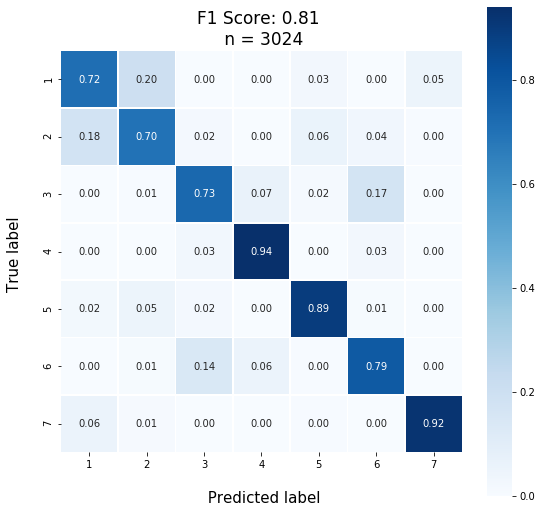

In [110]:
#AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=500, learning_rate=.5)
ada.fit(X, train_labels)
pred = ada.predict(transformed_dev)

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

Does worse than baseline model

### Checking feature importances and trying to create new features

In [111]:
#use random forest to see feature importances
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(train_data, train_labels)



feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = unscaled_inputs.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,importance
Elevation,0.210788
Horizontal_Distance_To_Roadways,0.092295
Horizontal_Distance_To_Fire_Points,0.070961
Horizontal_Distance_To_Hydrology,0.064213
Hillshade_9am,0.053289
Aspect,0.052288
Vertical_Distance_To_Hydrology,0.050173
Hillshade_3pm,0.045431
Wilderness_Area4,0.043639
Hillshade_Noon,0.042916


In [131]:
unscaled_inputs.iloc[:,:10]


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
4092,2264,133,23,175,81,1360,249,222,88,942
6790,2763,236,23,162,68,1020,174,253,209,1851
12822,2202,321,3,30,2,1358,211,236,164,743
13140,2394,350,12,42,2,845,198,220,160,1020
13991,3432,343,9,962,93,1423,202,227,163,1677
...,...,...,...,...,...,...,...,...,...,...
662,2719,48,7,361,33,1290,223,224,136,2177
12259,2941,57,16,0,0,404,229,203,102,1492
5486,2399,27,10,0,0,792,216,219,138,1075
11250,2521,45,36,258,120,1064,203,138,42,973


In [134]:
train_data_small = train_data[:,:20]

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(train_data_small, train_labels)



feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = unscaled_inputs.iloc[:,:20].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,importance
Elevation,0.296332
Horizontal_Distance_To_Roadways,0.097945
Horizontal_Distance_To_Fire_Points,0.081243
Horizontal_Distance_To_Hydrology,0.069777
Hillshade_9am,0.062310
Vertical_Distance_To_Hydrology,0.061207
Aspect,0.053500
Hillshade_Noon,0.050897
Hillshade_3pm,0.049671
Wilderness_Area4,0.049480


adaboost with only top 27 features (tried different n and this was best) - still no improvement

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


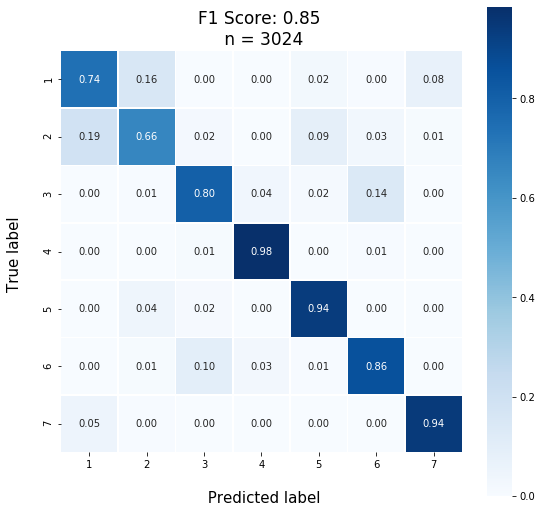

In [138]:
#AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=500, learning_rate=.5)
ada.fit(train_data[:,:27], train_labels)
pred = ada.predict(dev_data[:,:27])

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

In [149]:
#add new feature ratio of 2 most important features

#scale inputs
unscaled_inputs = train_df.iloc[:,1:-1]

#new feature is added
unscaled_inputs["Elevation/Roadways"] = unscaled_inputs["Elevation"] / unscaled_inputs["Horizontal_Distance_To_Roadways"]
unscaled_inputs.replace([np.inf, -np.inf], 0, inplace=True)


labels = train_df.iloc[:,-1:]
scaler = StandardScaler()
scaler.fit(unscaled_inputs)
scaled_inputs = scaler.transform(unscaled_inputs)

#partition train, dev, test (had to change how we partiton bc the old method didnt work on scaled arrays)
train_data, test_data, train_labels, test_labels = train_test_split(scaled_inputs, labels, test_size=0.2, random_state=1)
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2




#use random forest to see feature importances
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(train_data, train_labels)



feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = unscaled_inputs.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,importance
Elevation,0.225163
Horizontal_Distance_To_Roadways,0.071592
Horizontal_Distance_To_Fire_Points,0.066291
Elevation/Roadways,0.063956
Horizontal_Distance_To_Hydrology,0.055057
Hillshade_9am,0.054147
Vertical_Distance_To_Hydrology,0.049567
Wilderness_Area4,0.048130
Aspect,0.045891
Hillshade_Noon,0.042063


/Users/lindsayng/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


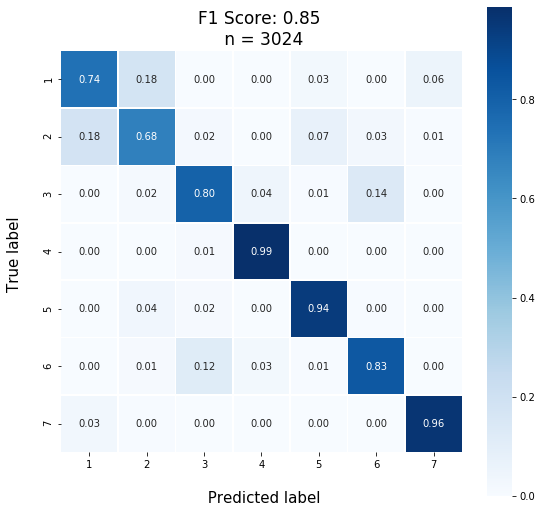

In [150]:
#AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=500, learning_rate=.5)
ada.fit(train_data, train_labels)
pred = ada.predict(dev_data)

#to plot confusion matrix
score = metrics.f1_score(dev_labels, pred, average='weighted')
cm = metrics.confusion_matrix(dev_labels, pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['1', '2',
    '3','4','5','6','7'], yticklabels = ['1', '2','3','4','5','6','7'])
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(score, pred.size)
plt.title(all_sample_title, size = 17);

Adaboost with additional feature - still no improvement